In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
import sys
sys.path.append("../")
from Modules import ds_functions as ds

Using TensorFlow backend.


### No missing values, outliers or scaling necessary

## Balancing

Best accuracy: 0.94  with  Original Dataset


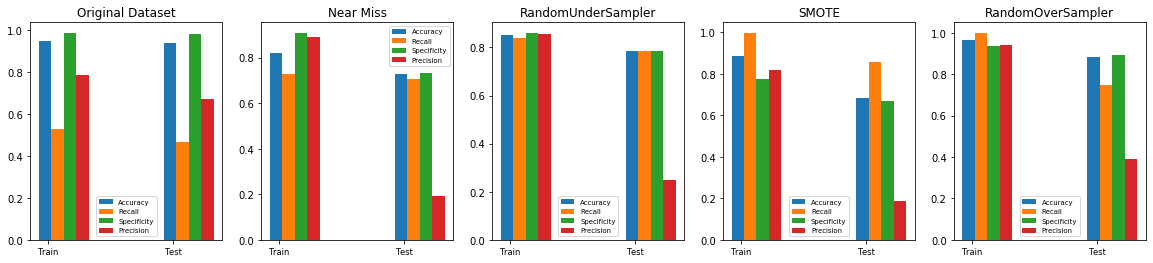

In [2]:
data: pd.DataFrame = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
trnX1, trnY1 = trnX, trnY

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
nm = NearMiss()
rus = RandomUnderSampler(random_state=42)
sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)

best = [0,0]
values = []
titles = ['Original Dataset', 'Near Miss', 'RandomUnderSampler', 'SMOTE', 'RandomOverSampler']
samp = [nm, rus, sm, ros, ros]

for i in range(5):
    clf.fit(trnX1, trnY1)
    prd_trn = clf.predict(trnX1)
    prd_tst = clf.predict(tstX)
    
    values.append([trnY1, prd_trn, tstY, prd_tst, titles[i]])
    if best[0] < metrics.accuracy_score(tstY, prd_tst):
        best[0] = metrics.accuracy_score(tstY, prd_tst)
        best[1] = titles[i]
    
    trnX1, trnY1 = samp[i].fit_resample(trnX, trnY)
    
print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
ds.plot_compare_results(pd.unique(y), values, len(values))

## Feature Selecting

### Variance 

Best accuracy: 0.94  with  <0.05 (426 vars)


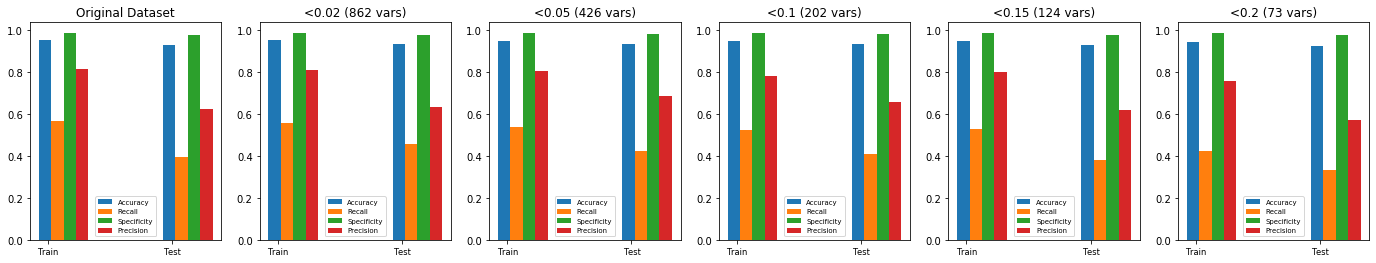

In [3]:
data: pd.DataFrame = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

X_values = []

X_values.append(X)
th = VarianceThreshold(threshold=0.02)
X_values.append(th.fit_transform(data))
th = VarianceThreshold(threshold=0.05)
X_values.append(th.fit_transform(data))
th = VarianceThreshold(threshold=0.1)
X_values.append(th.fit_transform(data))
th = VarianceThreshold(threshold=0.15)
X_values.append(th.fit_transform(data))
th = VarianceThreshold(threshold=0.2)
X_values.append(th.fit_transform(data))

best = [0,0]
values = []
titles = ['Original Dataset', '<0.02 (862 vars)', '<0.05 (426 vars)', '<0.1 (202 vars)', '<0.15 (124 vars)', '<0.2 (73 vars)']

for i in range(6):
    trnX, tstX, trnY, tstY = train_test_split(X_values[i], y, train_size=0.7, stratify=y)
    
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)

    values.append([trnY, prd_trn, tstY, prd_tst, titles[i]])
    if best[0] < metrics.accuracy_score(tstY, prd_tst):
        best[0] = metrics.accuracy_score(tstY, prd_tst)
        best[1] = titles[i]
    
print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
ds.plot_compare_results(pd.unique(y), values, len(values))

### Chi square

Best accuracy: 0.94  with  200


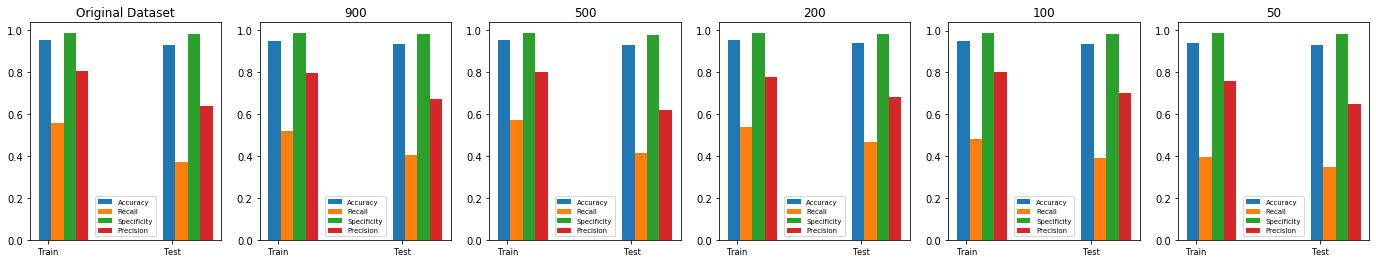

In [4]:
data: pd.DataFrame = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

X_values = []

X_values.append(X)
Best_vars = SelectKBest(chi2, k=900).fit_transform(X, y)
X_values.append(Best_vars)
Best_vars = SelectKBest(chi2, k=500).fit_transform(X, y)
X_values.append(Best_vars)
Best_vars = SelectKBest(chi2, k=200).fit_transform(X, y)
X_values.append(Best_vars)
Best_vars = SelectKBest(chi2, k=100).fit_transform(X, y)
X_values.append(Best_vars)
Best_vars = SelectKBest(chi2, k=50).fit_transform(X, y)
X_values.append(Best_vars)

best = [0,0]
values = []
titles = ['Original Dataset', '900', '500', '200', '100', '50']

for i in range(6):
    trnX, tstX, trnY, tstY = train_test_split(X_values[i], y, train_size=0.7, stratify=y)
    
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)

    values.append([trnY, prd_trn, tstY, prd_tst, titles[i]])
    if best[0] < metrics.accuracy_score(tstY, prd_tst):
        best[0] = metrics.accuracy_score(tstY, prd_tst)
        best[1] = titles[i]
    
print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
ds.plot_compare_results(pd.unique(y), values, len(values))

### Correlation Coefficient

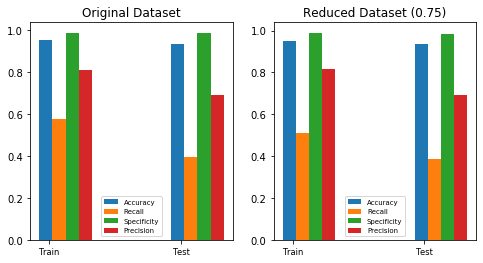

In [5]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

values = []

data: pd.DataFrame = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

values.append([trnY, prd_trn, tstY, prd_tst, 'Original Dataset'])

data: pd.DataFrame = pd.read_csv('../CD databases/toxicity_reduced.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

values.append([trnY, prd_trn, tstY, prd_tst, 'Reduced Dataset (0.75)'])

ds.plot_compare_results(pd.unique(y), values, len(values))

## Balance & feature select

Best accuracy: 0.92  with  ROS x 200 vars


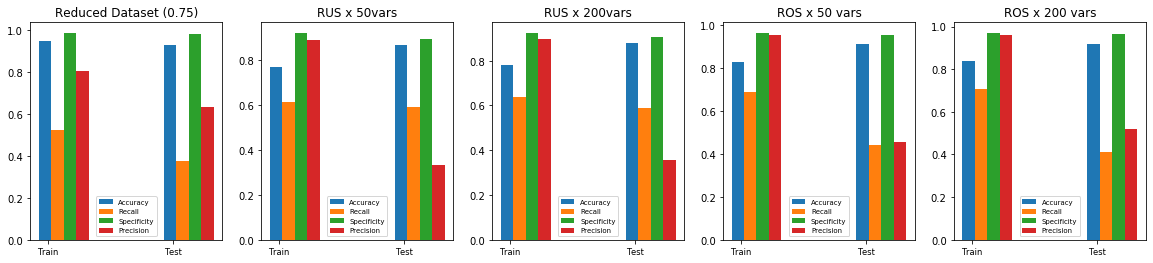

In [11]:
data: pd.DataFrame = pd.read_csv('../CD databases/toxicity_reduced.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

values = []
best = [0,0]
i = 0

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

values.append([trnY, prd_trn, tstY, prd_tst, 'Reduced Dataset (0.75)'])

X_values = []
Best_vars = SelectKBest(chi2, k=50).fit_transform(X, y)
X_values.append(Best_vars)
best_vars = SelectKBest(chi2, k=200).fit_transform(X, y)
X_values.append(Best_vars)

rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

titles = ['RUS x 50vars', 'RUS x 200vars', 'ROS x 50 vars', 'ROS x 200 vars']
samp = [rus, ros]

for s in samp:
    for X_var in X_values:
        trnX, tstX, trnY, tstY = train_test_split(X_var, y, train_size=0.7, stratify=y)

        trnX, trnY = s.fit_resample(trnX, trnY)
        
        clf.fit(trnX, trnY)
        prd_trn = clf.predict(trnX)
        prd_tst = clf.predict(tstX)

        values.append([trnY, prd_trn, tstY, prd_tst, titles[i]])
        if best[0] < metrics.accuracy_score(tstY, prd_tst):
            best[0] = metrics.accuracy_score(tstY, prd_tst)
            best[1] = titles[i]
        i += 1
print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
    
ds.plot_compare_results(pd.unique(y), values, len(values))

## Balance & feature select (reduced dataset)

Best accuracy: 0.92  with  ROS x 50 vars


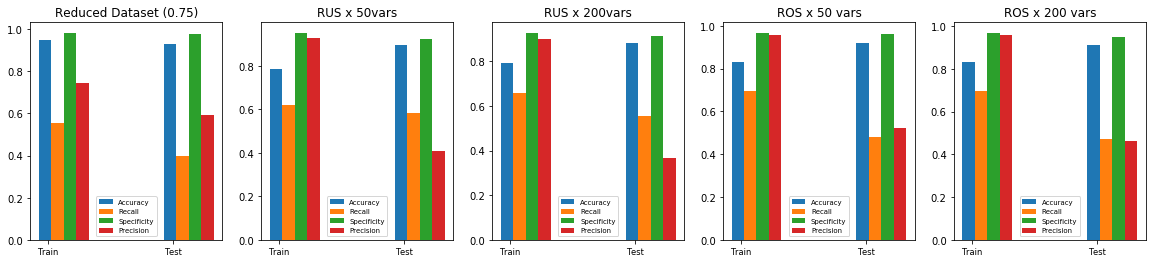

In [12]:
data: pd.DataFrame = pd.read_csv('../CD databases/toxicity_reduced.csv')
y: np.ndarray = data.pop('classification').values
X: np.ndarray = data.values
labels = pd.unique(y)
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

values = []
best = [0,0]
i = 0
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

values.append([trnY, prd_trn, tstY, prd_tst, 'Reduced Dataset (0.75)'])

X_values = []
Best_vars = SelectKBest(chi2, k=50).fit_transform(X, y)
X_values.append(Best_vars)
best_vars = SelectKBest(chi2, k=200).fit_transform(X, y)
X_values.append(Best_vars)

rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

titles = ['RUS x 50vars', 'RUS x 200vars', 'ROS x 50 vars', 'ROS x 200 vars']
samp = [rus, ros]

for s in samp:
    for X_var in X_values:
        trnX, tstX, trnY, tstY = train_test_split(X_var, y, train_size=0.7, stratify=y)

        trnX, trnY = s.fit_resample(trnX, trnY)
        
        clf.fit(trnX, trnY)
        prd_trn = clf.predict(trnX)
        prd_tst = clf.predict(tstX)

        values.append([trnY, prd_trn, tstY, prd_tst, titles[i]])
        if best[0] < metrics.accuracy_score(tstY, prd_tst):
            best[0] = metrics.accuracy_score(tstY, prd_tst)
            best[1] = titles[i]
        i += 1
print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
ds.plot_compare_results(pd.unique(y), values, len(values))